# EDA & Modeling

---
## EDA
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor

from sklearn import metrics

import timeit

import ast

In [2]:
df = pd.read_csv('../data/oct_merged_tracks.csv')

In [3]:
df.head()

,artist_name,artist_genre,track_name,track_id,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Frank Ocean,"['hip hop', 'lgbtq+ hip hop', 'neo soul', 'pop']",Thinkin Bout You,7DfFc7a6Rwfi3YQMRbDMau,78,2012,0.721,0.339,0,-11.195,1,0.0532,0.4090,0.001530,0.0973,0.200,129.830,200747,4
1,Carly Rae Jepsen,"['canadian pop', 'dance pop', 'electropop', 'p...",Call Me Maybe,3TGRqZ0a2l1LRblBkJoaDx,72,2012,0.783,0.580,7,-6.548,1,0.0408,0.0114,0.000002,0.1080,0.660,120.021,193400,4
2,Zedd,"['complextro', 'dance pop', 'edm', 'electro ho...",Clarity,60wwxj6Dd9NJlirf84wr2c,75,2012,0.509,0.781,8,-3.480,1,0.0720,0.0398,0.000000,0.0749,0.176,128.000,271427,4
3,fun.,"['baroque pop', 'metropopolis', 'modern rock',...",We Are Young (feat. Janelle Monáe),7a86XRg84qjasly9f6bPSD,74,2012,0.378,0.638,10,-5.576,1,0.0750,0.0200,0.000077,0.0849,0.735,184.086,250627,4
4,Frank Ocean,"['hip hop', 'lgbtq+ hip hop', 'neo soul', 'pop']",Super Rich Kids,0725YWm6Z0TpZ6wrNk64Eb,74,2012,0.739,0.419,3,-8.241,0,0.0854,0.2190,0.000000,0.1960,0.580,60.493,304760,4


In [4]:
(ast.literal_eval(df['artist_genre'][4]))

['hip hop', 'lgbtq+ hip hop', 'neo soul', 'pop']

In [5]:
for i in range(len(df['artist_genre'])):
    df['artist_genre'][i] = ast.literal_eval(df['artist_genre'][i])
df

C:\Users\sbhew\AppData\Local\Temp\ipykernel_2444\2024546511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['artist_genre'][i] = ast.literal_eval(df['artist_genre'][i])


,artist_name,artist_genre,track_name,track_id,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Frank Ocean,"[hip hop, lgbtq+ hip hop, neo soul, pop]",Thinkin Bout You,7DfFc7a6Rwfi3YQMRbDMau,78,2012,0.721,0.339,0,-11.195,1,0.0532,0.40900,0.001530,0.0973,0.200,129.830,200747,4
1,Carly Rae Jepsen,"[canadian pop, dance pop, electropop, pop, pos...",Call Me Maybe,3TGRqZ0a2l1LRblBkJoaDx,72,2012,0.783,0.580,7,-6.548,1,0.0408,0.01140,0.000002,0.1080,0.660,120.021,193400,4
2,Zedd,"[complextro, dance pop, edm, electro house, el...",Clarity,60wwxj6Dd9NJlirf84wr2c,75,2012,0.509,0.781,8,-3.480,1,0.0720,0.03980,0.000000,0.0749,0.176,128.000,271427,4
3,fun.,"[baroque pop, metropopolis, modern rock, pop r...",We Are Young (feat. Janelle Monáe),7a86XRg84qjasly9f6bPSD,74,2012,0.378,0.638,10,-5.576,1,0.0750,0.02000,0.000077,0.0849,0.735,184.086,250627,4
4,Frank Ocean,"[hip hop, lgbtq+ hip hop, neo soul, pop]",Super Rich Kids,0725YWm6Z0TpZ6wrNk64Eb,74,2012,0.739,0.419,3,-8.241,0,0.0854,0.21900,0.000000,0.1960,0.580,60.493,304760,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,Feid,"[colombian pop, pop reggaeton, reggaeton colom...",PURRITO APA,2HMuxjDbADZm2XQB9z9LAF,0,2022,0.626,0.662,6,-4.104,1,0.3290,0.04600,0.000000,0.0942,0.632,110.611,151400,5
10990,Feid,"[colombian pop, pop reggaeton, reggaeton colom...",911,55cGYuLq9uRveGoQ1uzI3j,0,2022,0.798,0.857,6,-3.748,1,0.1050,0.05190,0.000050,0.1420,0.581,102.998,221760,4
10991,Feid,"[colombian pop, pop reggaeton, reggaeton colom...",PURRITO APA,26M0lpaQPaLQmUBAiIz2Hw,0,2022,0.626,0.662,6,-4.104,1,0.3290,0.04600,0.000000,0.0942,0.632,110.611,151400,5
10992,David Guetta,"[big room, dance pop, edm, pop, pop dance]",Let's Love,1j1kIOeU1cH85D5BHNVvbb,0,2022,0.662,0.868,5,-4.025,1,0.0341,0.00882,0.002440,0.5840,0.353,92.998,200645,4


---
Dummifying the genres

---

In [6]:
dummy_df = pd.concat([df.drop(columns = 'artist_genre'), pd.get_dummies(df['artist_genre'].apply(pd.Series),
                                                      prefix='genre')], axis=1)
dummy_df

C:\Users\sbhew\AppData\Local\Temp\ipykernel_2444\3393540384.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy_df = pd.concat([df.drop(columns = 'artist_genre'), pd.get_dummies(df['artist_genre'].apply(pd.Series),


,artist_name,track_name,track_id,popularity,year,danceability,energy,key,loudness,mode,...,genre_roots rock,genre_soft rock,genre_tropical house,genre_viral rap,genre_wonky,genre_post-teen pop,genre_singer-songwriter,genre_southern rock,genre_symphonic rock,genre_tropical house
0,Frank Ocean,Thinkin Bout You,7DfFc7a6Rwfi3YQMRbDMau,78,2012,0.721,0.339,0,-11.195,1,...,0,0,0,0,0,0,0,0,0,0
1,Carly Rae Jepsen,Call Me Maybe,3TGRqZ0a2l1LRblBkJoaDx,72,2012,0.783,0.580,7,-6.548,1,...,0,0,0,0,0,0,0,0,0,0
2,Zedd,Clarity,60wwxj6Dd9NJlirf84wr2c,75,2012,0.509,0.781,8,-3.480,1,...,0,0,0,0,0,0,0,0,0,0
3,fun.,We Are Young (feat. Janelle Monáe),7a86XRg84qjasly9f6bPSD,74,2012,0.378,0.638,10,-5.576,1,...,0,0,0,0,0,0,0,0,0,0
4,Frank Ocean,Super Rich Kids,0725YWm6Z0TpZ6wrNk64Eb,74,2012,0.739,0.419,3,-8.241,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,Feid,PURRITO APA,2HMuxjDbADZm2XQB9z9LAF,0,2022,0.626,0.662,6,-4.104,1,...,0,0,0,0,0,0,0,0,0,0
10990,Feid,911,55cGYuLq9uRveGoQ1uzI3j,0,2022,0.798,0.857,6,-3.748,1,...,0,0,0,0,0,0,0,0,0,0
10991,Feid,PURRITO APA,26M0lpaQPaLQmUBAiIz2Hw,0,2022,0.626,0.662,6,-4.104,1,...,0,0,0,0,0,0,0,0,0,0
10992,David Guetta,Let's Love,1j1kIOeU1cH85D5BHNVvbb,0,2022,0.662,0.868,5,-4.025,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df2 = df
df2

,artist_name,artist_genre,track_name,track_id,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Frank Ocean,"[hip hop, lgbtq+ hip hop, neo soul, pop]",Thinkin Bout You,7DfFc7a6Rwfi3YQMRbDMau,78,2012,0.721,0.339,0,-11.195,1,0.0532,0.40900,0.001530,0.0973,0.200,129.830,200747,4
1,Carly Rae Jepsen,"[canadian pop, dance pop, electropop, pop, pos...",Call Me Maybe,3TGRqZ0a2l1LRblBkJoaDx,72,2012,0.783,0.580,7,-6.548,1,0.0408,0.01140,0.000002,0.1080,0.660,120.021,193400,4
2,Zedd,"[complextro, dance pop, edm, electro house, el...",Clarity,60wwxj6Dd9NJlirf84wr2c,75,2012,0.509,0.781,8,-3.480,1,0.0720,0.03980,0.000000,0.0749,0.176,128.000,271427,4
3,fun.,"[baroque pop, metropopolis, modern rock, pop r...",We Are Young (feat. Janelle Monáe),7a86XRg84qjasly9f6bPSD,74,2012,0.378,0.638,10,-5.576,1,0.0750,0.02000,0.000077,0.0849,0.735,184.086,250627,4
4,Frank Ocean,"[hip hop, lgbtq+ hip hop, neo soul, pop]",Super Rich Kids,0725YWm6Z0TpZ6wrNk64Eb,74,2012,0.739,0.419,3,-8.241,0,0.0854,0.21900,0.000000,0.1960,0.580,60.493,304760,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,Feid,"[colombian pop, pop reggaeton, reggaeton colom...",PURRITO APA,2HMuxjDbADZm2XQB9z9LAF,0,2022,0.626,0.662,6,-4.104,1,0.3290,0.04600,0.000000,0.0942,0.632,110.611,151400,5
10990,Feid,"[colombian pop, pop reggaeton, reggaeton colom...",911,55cGYuLq9uRveGoQ1uzI3j,0,2022,0.798,0.857,6,-3.748,1,0.1050,0.05190,0.000050,0.1420,0.581,102.998,221760,4
10991,Feid,"[colombian pop, pop reggaeton, reggaeton colom...",PURRITO APA,26M0lpaQPaLQmUBAiIz2Hw,0,2022,0.626,0.662,6,-4.104,1,0.3290,0.04600,0.000000,0.0942,0.632,110.611,151400,5
10992,David Guetta,"[big room, dance pop, edm, pop, pop dance]",Let's Love,1j1kIOeU1cH85D5BHNVvbb,0,2022,0.662,0.868,5,-4.025,1,0.0341,0.00882,0.002440,0.5840,0.353,92.998,200645,4


In [8]:
df.corr()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
popularity,1.000000,0.176371,0.129331,-0.030705,0.026633,-0.000435,-0.030242,0.035789,0.033786,-0.003644,0.006057,0.037928,-0.016884,-0.076567,-0.006413
year,0.176371,1.000000,0.184586,-0.100082,-0.000664,-0.014357,0.000347,0.104287,0.038038,-0.052280,-0.044493,0.019370,0.025573,-0.256747,-0.005628
danceability,0.129331,0.184586,1.000000,0.091019,0.015043,0.251720,-0.092855,0.266853,-0.178324,-0.221077,-0.054341,0.382068,-0.045883,-0.219244,0.179978
energy,-0.030705,-0.100082,0.091019,1.000000,0.046669,0.725913,-0.048504,0.025926,-0.629019,-0.169056,0.176160,0.386478,0.162066,0.014056,0.177869
key,0.026633,-0.000664,0.015043,0.046669,1.000000,0.029858,-0.140430,0.015008,-0.023614,-0.002037,0.001683,0.066712,0.008471,0.005552,-0.004133
loudness,-0.000435,-0.014357,0.251720,0.725913,0.029858,1.000000,-0.028390,-0.002167,-0.519686,-0.432443,0.090466,0.340885,0.152624,0.023751,0.194150
mode,-0.030242,0.000347,-0.092855,-0.048504,-0.140430,-0.028390,1.000000,-0.088882,0.067371,0.012117,-0.023209,-0.012138,-0.000647,-0.007740,-0.032409
speechiness,0.035789,0.104287,0.266853,0.025926,0.015008,-0.002167,-0.088882,1.000000,-0.084192,-0.107971,0.070403,0.050712,0.106540,-0.084487,0.076928
acousticness,0.033786,0.038038,-0.178324,-0.629019,-0.023614,-0.519686,0.067371,-0.084192,1.000000,0.179122,-0.106448,-0.154980,-0.138295,-0.024417,-0.168169
instrumentalness,-0.003644,-0.052280,-0.221077,-0.169056,-0.002037,-0.432443,0.012117,-0.107971,0.179122,1.000000,0.000561,-0.152217,-0.056615,-0.031719,-0.102161


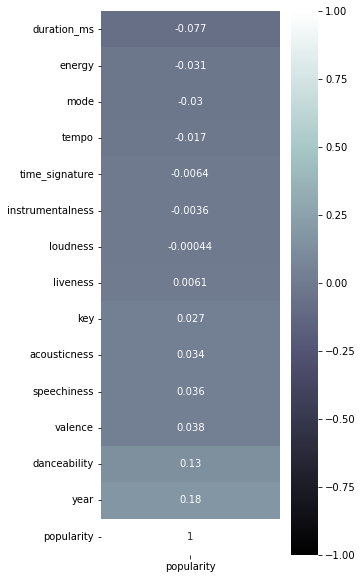

In [9]:
corr = df.corr()[['popularity']].sort_values(by = 'popularity')

plt.figure(figsize = (4, 10))

sns.heatmap(corr,
           cmap = 'bone',
           annot = True,
           vmin = -1,
           vmax = 1);

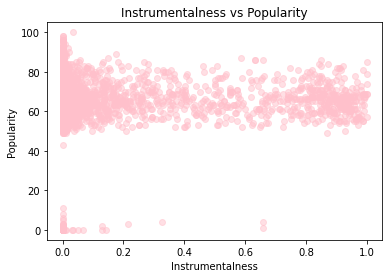

In [10]:
plt.title('Instrumentalness vs Popularity')

plt.scatter(df['instrumentalness'],
            df['popularity'],
           color = 'pink', alpha = 0.5)

plt.xlabel('Instrumentalness')
plt.ylabel('Popularity');

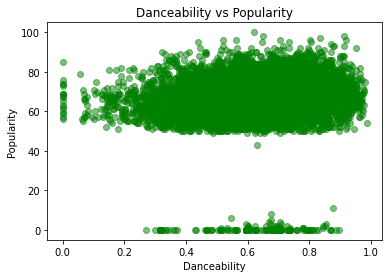

In [11]:
plt.title('Danceability vs Popularity')

plt.scatter(df['danceability'],
            df['popularity'],
           color = 'g', alpha = 0.5)

plt.xlabel('Danceability')
plt.ylabel('Popularity');

In [12]:
df2_genres = df2.explode('artist_genre')
df2_genres.rename(columns={'artist_genre' : 'genre'}, inplace = True)
df2_genres

,artist_name,genre,track_name,track_id,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Frank Ocean,hip hop,Thinkin Bout You,7DfFc7a6Rwfi3YQMRbDMau,78,2012,0.721,0.339,0,-11.195,1,0.0532,0.40900,0.001530,0.0973,0.200,129.830,200747,4
0,Frank Ocean,lgbtq+ hip hop,Thinkin Bout You,7DfFc7a6Rwfi3YQMRbDMau,78,2012,0.721,0.339,0,-11.195,1,0.0532,0.40900,0.001530,0.0973,0.200,129.830,200747,4
0,Frank Ocean,neo soul,Thinkin Bout You,7DfFc7a6Rwfi3YQMRbDMau,78,2012,0.721,0.339,0,-11.195,1,0.0532,0.40900,0.001530,0.0973,0.200,129.830,200747,4
0,Frank Ocean,pop,Thinkin Bout You,7DfFc7a6Rwfi3YQMRbDMau,78,2012,0.721,0.339,0,-11.195,1,0.0532,0.40900,0.001530,0.0973,0.200,129.830,200747,4
1,Carly Rae Jepsen,canadian pop,Call Me Maybe,3TGRqZ0a2l1LRblBkJoaDx,72,2012,0.783,0.580,7,-6.548,1,0.0408,0.01140,0.000002,0.1080,0.660,120.021,193400,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,David Guetta,dance pop,Let's Love,1j1kIOeU1cH85D5BHNVvbb,0,2022,0.662,0.868,5,-4.025,1,0.0341,0.00882,0.002440,0.5840,0.353,92.998,200645,4
10992,David Guetta,edm,Let's Love,1j1kIOeU1cH85D5BHNVvbb,0,2022,0.662,0.868,5,-4.025,1,0.0341,0.00882,0.002440,0.5840,0.353,92.998,200645,4
10992,David Guetta,pop,Let's Love,1j1kIOeU1cH85D5BHNVvbb,0,2022,0.662,0.868,5,-4.025,1,0.0341,0.00882,0.002440,0.5840,0.353,92.998,200645,4
10992,David Guetta,pop dance,Let's Love,1j1kIOeU1cH85D5BHNVvbb,0,2022,0.662,0.868,5,-4.025,1,0.0341,0.00882,0.002440,0.5840,0.353,92.998,200645,4


In [13]:
df2_genres['genre'].value_counts()

pop                   3173
rap                   2135
hip hop               1299
dance pop             1235
trap                  1018
                      ... 
idol rock                1
comic metal              1
salsa colombiana         1
pony                     1
russian electronic       1
Name: genre, Length: 1089, dtype: int64

In [16]:
df2_genres.to_excel('./data/artist_genre.xlsx')
df2_genres.to_csv('./data/artist_genre.csv', index = False)

In [14]:
df = pd.concat([df.drop(columns = 'artist_genre'), pd.get_dummies(df['artist_genre'].apply(pd.Series),
                                                      prefix='genre')], axis=1)

C:\Users\sbhew\AppData\Local\Temp\ipykernel_2444\817505360.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = pd.concat([df.drop(columns = 'artist_genre'), pd.get_dummies(df['artist_genre'].apply(pd.Series),


In [15]:
df

,artist_name,track_name,track_id,popularity,year,danceability,energy,key,loudness,mode,...,genre_roots rock,genre_soft rock,genre_tropical house,genre_viral rap,genre_wonky,genre_post-teen pop,genre_singer-songwriter,genre_southern rock,genre_symphonic rock,genre_tropical house
0,Frank Ocean,Thinkin Bout You,7DfFc7a6Rwfi3YQMRbDMau,78,2012,0.721,0.339,0,-11.195,1,...,0,0,0,0,0,0,0,0,0,0
1,Carly Rae Jepsen,Call Me Maybe,3TGRqZ0a2l1LRblBkJoaDx,72,2012,0.783,0.580,7,-6.548,1,...,0,0,0,0,0,0,0,0,0,0
2,Zedd,Clarity,60wwxj6Dd9NJlirf84wr2c,75,2012,0.509,0.781,8,-3.480,1,...,0,0,0,0,0,0,0,0,0,0
3,fun.,We Are Young (feat. Janelle Monáe),7a86XRg84qjasly9f6bPSD,74,2012,0.378,0.638,10,-5.576,1,...,0,0,0,0,0,0,0,0,0,0
4,Frank Ocean,Super Rich Kids,0725YWm6Z0TpZ6wrNk64Eb,74,2012,0.739,0.419,3,-8.241,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,Feid,PURRITO APA,2HMuxjDbADZm2XQB9z9LAF,0,2022,0.626,0.662,6,-4.104,1,...,0,0,0,0,0,0,0,0,0,0
10990,Feid,911,55cGYuLq9uRveGoQ1uzI3j,0,2022,0.798,0.857,6,-3.748,1,...,0,0,0,0,0,0,0,0,0,0
10991,Feid,PURRITO APA,26M0lpaQPaLQmUBAiIz2Hw,0,2022,0.626,0.662,6,-4.104,1,...,0,0,0,0,0,0,0,0,0,0
10992,David Guetta,Let's Love,1j1kIOeU1cH85D5BHNVvbb,0,2022,0.662,0.868,5,-4.025,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.to_csv('../data/dummified_genres.csv', index = False)

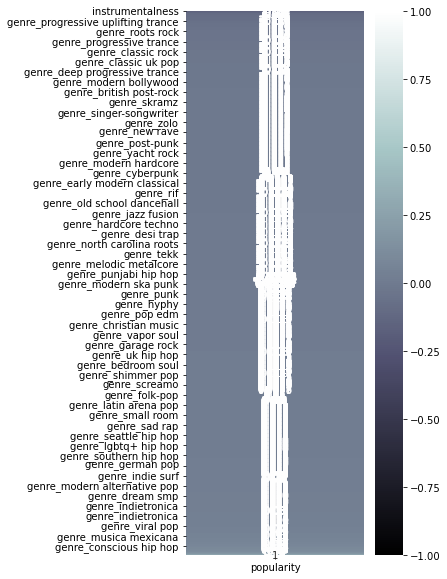

In [15]:
corr = df.corr()[['popularity']].sort_values(by = 'popularity')

plt.figure(figsize = (4, 10))

sns.heatmap(corr,
           cmap = 'bone',
           annot = True,
           vmin = -1,
           vmax = 1);

In [16]:
corr

,popularity
duration_ms,-0.076567
energy,-0.030705
mode,-0.030242
tempo,-0.016884
time_signature,-0.006413
instrumentalness,-0.003644
loudness,-0.000435
liveness,0.006057
key,0.026633
acousticness,0.033786


In [17]:
df['artist_name'].value_counts()

Taylor Swift               160
Drake                      138
The Weeknd                 120
$uicideboy$                 95
Ed Sheeran                  89
                          ... 
Modest Mouse                 1
Allie X                      1
Bullet For My Valentine      1
Annie Lennox                 1
Código FN                    1
Name: artist_name, Length: 2971, dtype: int64

In [18]:
df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year',
       'danceability', 'energy', 'key', 'loudness', 'mode',
       ...
       'genre_roots rock', 'genre_soft rock', 'genre_tropical house',
       'genre_viral rap', 'genre_wonky', 'genre_post-teen pop',
       'genre_singer-songwriter', 'genre_southern rock',
       'genre_symphonic rock', 'genre_tropical house'],
      dtype='object', length=2375)

---
## Modeling
---

##### Popularity by Audio Features

In [19]:
X = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [20]:
def model(model):
    models = model
    models.fit(X_train, y_train)
    print(f'{model}')
    print(f'Training r2 score: {models.score(X_train, y_train)}')
    print(f'Testing r2 score: {models.score(X_test, y_test)}')
    print(f'Testing MSE: {metrics.mean_squared_error(y_test, models.predict(X_test))}')
    return print('='*40)

In [21]:
model(LinearRegression())
model(KNeighborsRegressor())
model(DecisionTreeRegressor())
model(BaggingRegressor())
model(RandomForestRegressor())
model(AdaBoostRegressor())
model(RidgeCV())
model(LassoCV())

LinearRegression()
Training r2 score: 0.026737628095469312
Testing r2 score: 0.00836004423756942
Testing MSE: 167.3369326780991
KNeighborsRegressor()
Training r2 score: 0.4036857523728873
Testing r2 score: 0.15365831205133318
Testing MSE: 142.81818843215714
DecisionTreeRegressor()
Training r2 score: 0.9548896151819489
Testing r2 score: -0.30798033951260306
Testing MSE: 220.7186355747586
BaggingRegressor()
Training r2 score: 0.82931027190485
Testing r2 score: 0.21903163270875048
Testing MSE: 131.78659284726245
RandomForestRegressor()
Training r2 score: 0.8685021503599646
Testing r2 score: 0.28397504033169085
Testing MSE: 120.82754408552631
AdaBoostRegressor()
Training r2 score: 0.004779353490494076
Testing r2 score: 0.01241332002970108
Testing MSE: 166.65295182959423
RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
Training r2 score: 0.02673665296185801
Testing r2 score: 0.008445257216779578
Testing MSE: 167.32255318634654
LassoCV()
Training r2 score: 0.026696329309310096
Testing r2 score: 0.0

In [13]:
df.head(2)

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,genre_southern rock,genre_symphonic rock,genre_vapor soul,genre_roots rock,genre_soft rock,genre_symphonic rock,genre_southern rock,genre_symphonic rock,genre_zolo,genre_swamp rock
0,Frank Ocean,Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,...,0,0,0,0,0,0,0,0,0,0
1,David Bowie,Five Years - 2012 Remaster,1JIzFhI9Lt5FyslawmHCBi,59,0.460,0.326,7,-10.699,1,0.0417,...,0,0,0,0,0,0,0,0,0,0


##### Popularity by Specific Genres and Specifc Audio Features

In [19]:
dummy_df['genre_hip hop']

,genre_hip hop,genre_hip hop,genre_hip hop,genre_hip hop,genre_hip hop
0,1,0,0,0,0
1,0,0,0,0,0
2,0,1,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10059,0,0,0,0,0
10060,0,1,0,0,0
10061,0,0,0,0,0
10062,0,0,0,0,0


In [21]:
X = dummy_df[['genre_pop', 'genre_hip hop', 'genre_rap', 'danceability', 'energy','valence', 'tempo']]
y = dummy_df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

model(LinearRegression())
model(KNeighborsRegressor())
model(DecisionTreeRegressor())
model(BaggingRegressor())
model(RandomForestRegressor())
model(AdaBoostRegressor())

LinearRegression()
Training r2 score: 0.2620280973766298
Testing r2 score: 0.26159653639060143
Testing MSE: 705.7366685841644
KNeighborsRegressor()
Training r2 score: 0.4434532888171574
Testing r2 score: 0.12458863741799842
Testing MSE: 836.6833704292529
DecisionTreeRegressor()
Training r2 score: 0.9958322420465594
Testing r2 score: -0.32904949027321617
Testing MSE: 1270.2526543741455
BaggingRegressor()
Training r2 score: 0.8689185045310344
Testing r2 score: 0.23881341737906403
Testing MSE: 727.5118677856465
RandomForestRegressor()
Training r2 score: 0.9031097193572821
Testing r2 score: 0.2922816330381549
Testing MSE: 676.4090733730415
AdaBoostRegressor()
Training r2 score: 0.10767777096995723
Testing r2 score: 0.11479706760923192
Testing MSE: 846.041763499716


##### Popularity by Specific Audio Features

In [15]:
X = df[['danceability', 'energy', 'key', 'mode', 'valence', 'tempo', 'time_signature']]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

model(LinearRegression())
model(KNeighborsRegressor())
model(DecisionTreeRegressor())
model(BaggingRegressor())
model(RandomForestRegressor())
model(AdaBoostRegressor())

LinearRegression()
Training r2 score: 0.04336344062169206
Testing r2 score: 0.05415392042104561
Testing MSE: 904.0020721632858
KNeighborsRegressor()
Training r2 score: 0.282928189133687
Testing r2 score: -0.07567443539395957
Testing MSE: 1028.086852146264
DecisionTreeRegressor()
Training r2 score: 0.9958367115900001
Testing r2 score: -0.6106696168927599
Testing MSE: 1539.413973032128
BaggingRegressor()
Training r2 score: 0.8323738706301288
Testing r2 score: 0.0820794586395942
Testing MSE: 877.3119531673063
RandomForestRegressor()
Training r2 score: 0.8798001319892551
Testing r2 score: 0.14199309105899327
Testing MSE: 820.0488857112605
AdaBoostRegressor()
Training r2 score: 0.09346511883979725
Testing r2 score: 0.08600222405503066
Testing MSE: 873.5627299683862


##### Popularity by Audio Features & Genre

In [30]:
X = dummy_df.drop(columns = ['artist_name', 'track_name', 'track_id', 'popularity'])
y = dummy_df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

model(LinearRegression())
model(KNeighborsRegressor())
model(DecisionTreeRegressor())
model(BaggingRegressor())
model(RandomForestRegressor())
model(AdaBoostRegressor())
model(RidgeCV())
model(LassoCV())

LinearRegression()
Training r2 score: 0.848259491189134
Testing r2 score: 0.6400979155777753
Testing MSE: 343.98010111582664
KNeighborsRegressor()
Training r2 score: 0.30470432994759455
Testing r2 score: -0.014225786796257411
Testing MSE: 969.3566772655007
DecisionTreeRegressor()
Training r2 score: 0.9960905676901023
Testing r2 score: 0.059632015463668586
Testing MSE: 898.766326752951
BaggingRegressor()
Training r2 score: 0.9034935969434332
Testing r2 score: 0.4709377427464244
Testing MSE: 505.656667809547
RandomForestRegressor()
Training r2 score: 0.92942484822593
Testing r2 score: 0.509729974653244
Testing MSE: 468.580595090385
AdaBoostRegressor()
Training r2 score: 0.15594674075260917
Testing r2 score: 0.15075986937885966
Testing MSE: 811.6699475959983
RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
Training r2 score: 0.8123865994303322
Testing r2 score: 0.7014842941078876
Testing MSE: 285.30944148955376
LassoCV()
Training r2 score: 0.0005630326787589013
Testing r2 score: 0.00186900590683

In [17]:
start = timeit.default_timer()

rf = RandomForestRegressor()
rf_params = {
    'n_estimators': [100, 150, 200, 300],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_leaf_nodes': [None, 2, 3, 5]
}
rf_gs = GridSearchCV(rf, 
                  rf_params,
                  cv = 5,
                  verbose=1)
rf_gs.fit(X_train, y_train)
print(f'Training r2 score: {rf_gs.score(X_train, y_train)}')
print(f'Testing r2 score: {rf_gs.score(X_test, y_test)}')
print(f'Testing MSE: {metrics.mean_squared_error(y_test, rf_gs.predict(X_test))}')

stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Training r2 score: 0.9313716035541262
Testing r2 score: 0.5109198344621072
Testing MSE: 467.443374398753
Time to run this code (in seconds): 11391.808565199999


In [18]:
rf_gs.best_params_

{'max_leaf_nodes': None, 'min_samples_leaf': 1, 'n_estimators': 300}

In [19]:
rf = RandomForestRegressor(max_leaf_nodes = None, min_samples_leaf = 2, n_estimators = 300)
rf.fit(X_train, y_train)
print(f'Training r2 score: {rf.score(X_train, y_train)}')
print(f'Testing r2 score: {rf.score(X_test, y_test)}')
print(f'Testing MSE: {metrics.mean_squared_error(y_test, rf.predict(X_test))}')
print(f'Baseline MSE: {metrics.mean_squared_error(y_test, pd.Series(y.mean(), index=range(len(y_test))))}')

Training r2 score: 0.894349285212811
Testing r2 score: 0.49561982240026214
Testing MSE: 482.0665175365754
Baseline MSE: 955.763719547835


In [20]:
ridge = RidgeCV()
ridge.get_params()

{'alpha_per_target': False,
 'alphas': array([ 0.1,  1. , 10. ]),
 'cv': None,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': 'deprecated',
 'scoring': None,
 'store_cv_values': False}

In [25]:
start = timeit.default_timer()

ridge = RidgeCV()
ridge_params = {
    'fit_intercept': [True, False],

}
ridge_gs = GridSearchCV(ridge, 
                  ridge_params,
                  cv = 5,
                  verbose=1)
ridge_gs.fit(X_train, y_train)
print(f'Training r2 score: {ridge_gs.score(X_train, y_train)}')
print(f'Testing r2 score: {ridge_gs.score(X_test, y_test)}')
print(f'Testing MSE: {metrics.mean_squared_error(y_test, ridge_gs.predict(X_test))}')

stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Training r2 score: 0.8123865994303322
Testing r2 score: 0.7014842941078876
Testing MSE: 285.30944148955376
Time to run this code (in seconds): 46.398531200000434


In [26]:
ridge_gs.best_params_

{'fit_intercept': True}

In [27]:
knn = KNeighborsRegressor()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [28]:
start = timeit.default_timer()

knn = KNeighborsRegressor()
knn_params = {
    'n_neighbors': [4, 8, 16, 32],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'leaf_size': [15, 30, 45]
}
knn_gs = GridSearchCV(knn, 
                  knn_params,
                  cv = 5,
                  verbose=1)
knn_gs.fit(X_train, y_train)
print(f'Training r2 score: {knn_gs.score(X_train, y_train)}')
print(f'Testing r2 score: {knn_gs.score(X_test, y_test)}')
print(f'Testing MSE: {metrics.mean_squared_error(y_test, knn_gs.predict(X_test))}')

stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Training r2 score: 0.1566538962390185
Testing r2 score: 0.10586253133455925
Testing MSE: 854.5810379974414
Time to run this code (in seconds): 8013.285211499999


In [29]:
knn_gs.best_params_

{'leaf_size': 15, 'metric': 'euclidean', 'n_neighbors': 32}

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f'Training r2 score: {lr.score(X_train, y_train)}')
print(f'Testing r2 score: {lr.score(X_test, y_test)}')
print(f'Testing MSE: {metrics.mean_squared_error(y_test, lr.predict(X_test))}')
print(f'Baseline MSE: {metrics.mean_squared_error(y_test, pd.Series(y.mean(), index=range(len(y_test))))}')

Training r2 score: 0.848259491189134
Testing r2 score: 0.6400979155777753
Testing MSE: 343.98010111582664
Baseline MSE: 955.763719547835


In [31]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [35]:
dummy_df.columns.value_counts().head(20)

genre_soft rock              11
genre_tropical house         11
genre_viral rap              11
genre_rock                   11
genre_uk pop                 11
genre_stomp and holler       10
genre_trap                   10
genre_roots rock             10
genre_underground hip hop     9
genre_mellow gold             9
genre_r&b                     9
genre_pop                     9
genre_trance                  9
genre_progressive house       9
genre_uplifting trance        9
genre_pop rock                8
genre_hard rock               8
genre_rap                     8
genre_new wave pop            8
genre_southern hip hop        8
dtype: int64